# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

In [43]:
# create empty lists for data
city_list = []
country = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind_speed = []


# counter for print log:
i = 0

# for loop to retrieve data for each city
# try & except used to account for cities that have no data
# slice for sample: [0:10]
for city in cities:
    try:
        i+=1
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
        print(f"Retrieving data for # {i} : {city}")
        time.sleep(.2)
    
    except:
        print("City not found. Continuing for next city's data...")

Retrieving data for # 1 : nome
Retrieving data for # 2 : albany
Retrieving data for # 3 : butaritari
Retrieving data for # 4 : chimbote
Retrieving data for # 5 : bluff
Retrieving data for # 6 : tura
Retrieving data for # 7 : bengkulu
Retrieving data for # 8 : lebu
Retrieving data for # 9 : malakal
Retrieving data for # 10 : axim
Retrieving data for # 11 : new norfolk
City not found. Continuing for next city's data...
Retrieving data for # 13 : busselton
Retrieving data for # 14 : jamestown
Retrieving data for # 15 : yellowknife
Retrieving data for # 16 : camotan
Retrieving data for # 17 : aquiraz
Retrieving data for # 18 : necochea
Retrieving data for # 19 : cuamba
Retrieving data for # 20 : ahipara
Retrieving data for # 21 : codrington
Retrieving data for # 22 : isangel
Retrieving data for # 23 : ruteng
Retrieving data for # 24 : airai
City not found. Continuing for next city's data...
Retrieving data for # 26 : san isidro
Retrieving data for # 27 : sorland
Retrieving data for # 28 : 

Retrieving data for # 219 : shingu
Retrieving data for # 220 : pratapgarh
Retrieving data for # 221 : dzilam gonzalez
Retrieving data for # 222 : veraval
City not found. Continuing for next city's data...
Retrieving data for # 224 : kodiak
Retrieving data for # 225 : pervomayskiy
Retrieving data for # 226 : ossora
Retrieving data for # 227 : pingliang
Retrieving data for # 228 : kirby
Retrieving data for # 229 : marsabit
Retrieving data for # 230 : tiarei
Retrieving data for # 231 : jaciara
Retrieving data for # 232 : hokitika
Retrieving data for # 233 : asau
Retrieving data for # 234 : liverpool
Retrieving data for # 235 : coihaique
City not found. Continuing for next city's data...
Retrieving data for # 237 : te anau
Retrieving data for # 238 : chillicothe
Retrieving data for # 239 : carnarvon
Retrieving data for # 240 : nanortalik
Retrieving data for # 241 : bajil
City not found. Continuing for next city's data...
Retrieving data for # 243 : abu samrah
City not found. Continuing for

Retrieving data for # 432 : sola
Retrieving data for # 433 : gamba
Retrieving data for # 434 : teguise
Retrieving data for # 435 : juneau
Retrieving data for # 436 : klaksvik
Retrieving data for # 437 : khandyga
Retrieving data for # 438 : sambava
Retrieving data for # 439 : ruwi
Retrieving data for # 440 : marienburg
Retrieving data for # 441 : provideniya
Retrieving data for # 442 : maiduguri
Retrieving data for # 443 : comodoro rivadavia
Retrieving data for # 444 : harper
Retrieving data for # 445 : dalby
Retrieving data for # 446 : adrar
Retrieving data for # 447 : oga
Retrieving data for # 448 : merauke
Retrieving data for # 449 : thaton
Retrieving data for # 450 : ostrovnoy
Retrieving data for # 451 : nemuro
City not found. Continuing for next city's data...
Retrieving data for # 453 : doha
Retrieving data for # 454 : coffs harbour
Retrieving data for # 455 : borogontsy
City not found. Continuing for next city's data...
Retrieving data for # 457 : opuwo
Retrieving data for # 458 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# dictionary created to hold all API data
weather_dict = {
    "City": city_list,
    "Country": country,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed}
#weather_dict

In [45]:
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          588
Country       588
Latitude      588
Longitude     588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
dtype: int64

In [46]:
weather_data.head(10)

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,64.5011,-165.4064,-0.40,42,1,11.50
1,Albany,US,42.6001,-73.9662,30.00,71,100,3.42
2,Butaritari,KI,3.0707,172.7902,80.94,83,16,16.33
3,Chimbote,PE,-9.0853,-78.5783,75.67,69,23,10.31
4,Bluff,NZ,-46.6000,168.3333,52.39,90,100,13.06
5,Tura,IN,25.5198,90.2201,59.07,38,14,2.82
6,Bengkulu,ID,-3.8004,102.2655,75.51,87,96,4.27
7,Lebu,CL,-37.6167,-73.6500,66.36,69,6,13.09
8,Malakal,SS,9.5334,31.6605,78.06,23,43,5.37
9,Esim,GH,4.8699,-2.2405,81.18,83,75,9.69


In [49]:
# export to csv
weather_data.to_csv(output_data_file, index=None, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
# quartiles & outliers: Matplotlib Homework
high_humidity = weather_data.loc[weather_data["Humidity"] > 100]
high_humidity

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

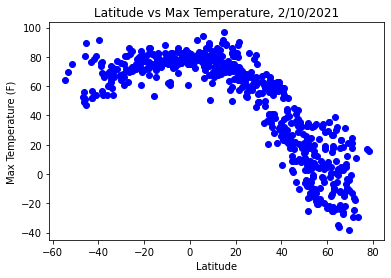

In [51]:
# MATPLOTLIB DAY 1 ACTIVITY 11: SCATTER PLOTS
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue")
#plt.ylim()
#plt.xlim()
plt.title("Latitude vs Max Temperature, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("WeatherPyImages/LatTempPlot.png")
plt.show()

## Latitude vs. Humidity Plot

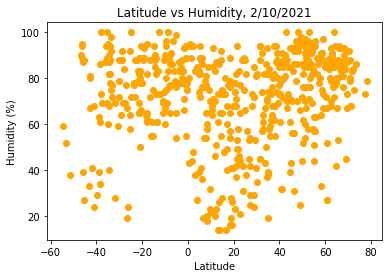

In [52]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="orange")
#plt.ylim()
#plt.xlim()
plt.title("Latitude vs Humidity, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("WeatherPyImages/LatHumidPlot.png")
plt.show()

## Latitude vs. Cloudiness Plot

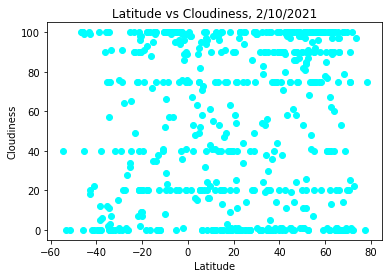

In [53]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="cyan")
#plt.ylim()
#plt.xlim()
plt.title("Latitude vs Cloudiness, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("WeatherPyImages/LatCloudPlot.png")
plt.show()

## Latitude vs. Wind Speed Plot

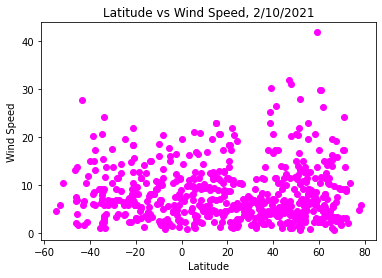

In [54]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="magenta")
#plt.ylim()
#plt.xlim()
plt.title("Latitude vs Wind Speed, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WeatherPyImages/LatWindPlot.png")
plt.show()

## Linear Regression

In [ ]:
# Matplotlib DAY 3 ACTIVITY 9 OR weather stats activity
# Perform a linear regression on temperature vs. latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept

# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

In [55]:
# create 2 separate dataframes for N & S hemispheres
NHemi = weather_data.loc[weather_data["Latitude"] >= 0]
NHemi

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,64.5011,-165.4064,-0.40,42,1,11.50
1,Albany,US,42.6001,-73.9662,30.00,71,100,3.42
2,Butaritari,KI,3.0707,172.7902,80.94,83,16,16.33
5,Tura,IN,25.5198,90.2201,59.07,38,14,2.82
8,Malakal,SS,9.5334,31.6605,78.06,23,43,5.37
...,...,...,...,...,...,...,...,...
583,Almaznyy,RU,48.0448,40.0450,35.60,100,75,20.13
584,Myingyan,MM,21.4667,95.3833,64.40,49,0,1.16
585,Chornukhy,UA,50.2673,32.9420,14.74,96,98,4.63
586,Beatrice,US,40.2681,-96.7470,6.01,61,1,4.61


In [56]:
SHemi = weather_data.loc[weather_data["Latitude"] < 0]
SHemi

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
3,Chimbote,PE,-9.0853,-78.5783,75.67,69,23,10.31
4,Bluff,NZ,-46.6000,168.3333,52.39,90,100,13.06
6,Bengkulu,ID,-3.8004,102.2655,75.51,87,96,4.27
7,Lebu,CL,-37.6167,-73.6500,66.36,69,6,13.09
10,New Norfolk,AU,-42.7826,147.0587,52.00,67,18,1.68
...,...,...,...,...,...,...,...,...
556,Mporokoso,ZM,-9.3727,30.1250,62.31,96,100,2.08
562,Plettenberg Bay,ZA,-34.0527,23.3716,66.22,88,3,2.35
567,Soyo,AO,-6.1349,12.3689,78.66,83,100,5.50
568,Cap Malheureux,MU,-19.9842,57.6142,77.00,78,9,3.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

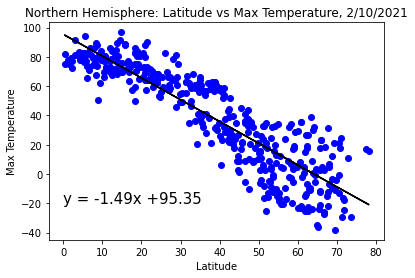

In [59]:
# scatter plot
x_values = NHemi['Latitude']
y_values = NHemi['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue")
#plt.ylim()
#plt.xlim()
plt.title("Northern Hemisphere: Latitude vs Max Temperature, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(0,-20),fontsize=15,color="black")

plt.savefig("WeatherPyImages/NHLatTempLR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

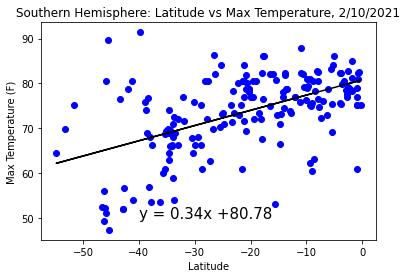

In [61]:
# scatter plot
x_values = SHemi['Latitude']
y_values = SHemi['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue")
#plt.ylim()
#plt.xlim()
plt.title("Southern Hemisphere: Latitude vs Max Temperature, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(-40,50),fontsize=15,color="black")

plt.savefig("WeatherPyImages/SHLatTempLR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

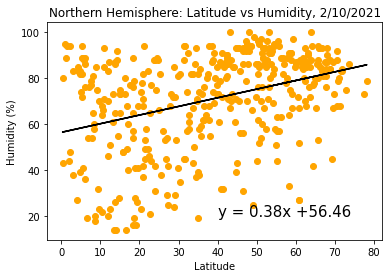

In [63]:
# scatter plot
x_values = NHemi['Latitude']
y_values = NHemi['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="orange")
#plt.ylim()
#plt.xlim()
plt.title("Northern Hemisphere: Latitude vs Humidity, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(40,20),fontsize=15,color="black")

plt.savefig("WeatherPyImages/NHLatHumidLR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

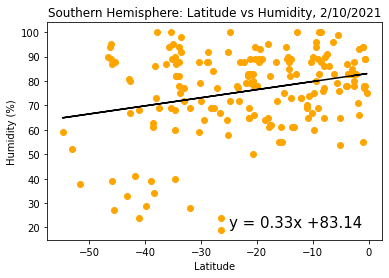

In [66]:
# scatter plot
x_values = SHemi['Latitude']
y_values = SHemi['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="orange")
#plt.ylim()
#plt.xlim()
plt.title("Southern Hemisphere: Latitude vs Humidity, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(-25,20),fontsize=15,color="black")

plt.savefig("WeatherPyImages/SHLatHumidLR.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

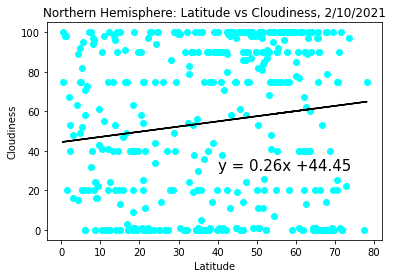

In [68]:
# scatter plot
x_values = NHemi['Latitude']
y_values = NHemi['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="cyan")
#plt.ylim()
#plt.xlim()
plt.title("Northern Hemisphere: Latitude vs Cloudiness, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(40,30),fontsize=15,color="black")

plt.savefig("WeatherPyImages/NHLatCloudLR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

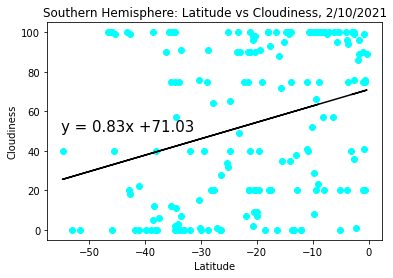

In [72]:
# scatter plot
x_values = SHemi['Latitude']
y_values = SHemi['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="cyan")
#plt.ylim()
#plt.xlim()
plt.title("Southern Hemisphere: Latitude vs Cloudiness, 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(-55,50),fontsize=15,color="black")

plt.savefig("WeatherPyImages/SHLatCloudLR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

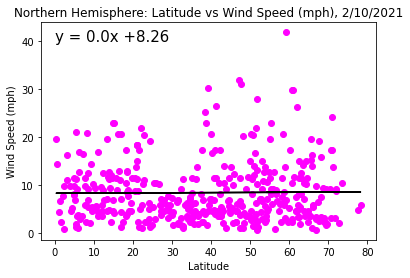

In [74]:
# scatter plot
x_values = NHemi['Latitude']
y_values = NHemi['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="magenta")
#plt.ylim()
#plt.xlim()
plt.title("Northern Hemisphere: Latitude vs Wind Speed (mph), 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(0,40),fontsize=15,color="black")

plt.savefig("WeatherPyImages/NHLatWindLR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

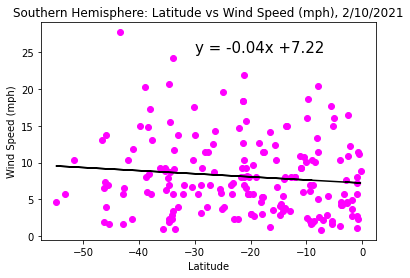

In [76]:
# scatter plot
x_values = SHemi['Latitude']
y_values = SHemi['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="magenta")
#plt.ylim()
#plt.xlim()
plt.title("Southern Hemisphere: Latitude vs Wind Speed (mph), 2/10/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(-30,25),fontsize=15,color="black")

plt.savefig("WeatherPyImages/SHLatWind.png")
plt.show()